In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [3]:
labor_df = pd.read_csv('clean_data.csv')
labor_df

,State,Year,Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Value of production (million $)
0,Alabama,2015,99.748,-0.3,34.508,2.8,153074.368
1,Alabama,2016,98.518,-1.2,34.599,0.3,156265.773
2,Alabama,2017,99.447,0.9,34.840,0.7,161411.784
3,Alabama,2018,101.454,2.0,35.046,0.6,171145.010
4,Alabama,2019,103.805,2.3,35.662,1.8,179040.839
...,...,...,...,...,...,...,...
250,Wyoming,2015,104.106,8.2,33.465,0.6,29013.577
251,Wyoming,2016,108.252,4.0,33.936,1.4,26989.301
252,Wyoming,2017,107.093,-1.1,33.848,-0.3,28689.195
253,Wyoming,2018,104.055,-2.8,34.561,2.1,30169.574


In [4]:
labor_df.columns

Index(['State', 'Year', 'Labor productivity (2012=100)',
       'Labor productivity (percent change)',
       'Real hourly labor compensation cost ($/hour)',
       'Real hourly labor compensation cost (percent change)',
       'Value of production (million $)'],
      dtype='object')

## Compare Real Hourly Labor Compensation Cost ($/hour) across the US
Look at average compensation per state over the last 5 years

LOWEST 5 STATES COMPENSATION COST
-----------------------
Hawaii: $29.65 per hour
Maine: $31.46 per hour
Mississippi: $31.89 per hour
Montana: $31.98 per hour
Vermont: $31.99 per hour
Idaho: $32.24 per hour
New Mexico: $33.06 per hour
West Virginia: $33.62 per hour
South Carolina: $33.96 per hour
Florida: $34.03 per hour
Wyoming: $34.13 per hour
Nevada: $34.19 per hour
South Dakota: $34.25 per hour
Arkansas: $34.4 per hour
Alabama: $34.93 per hour


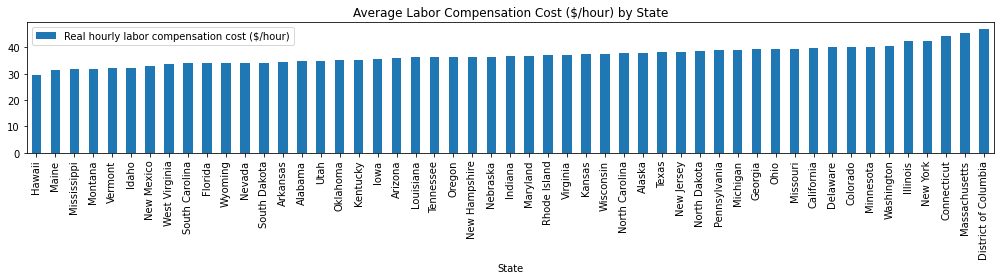

In [5]:
# Group by state and get the averages; then plot for comparison
avg_comp = labor_df.groupby('State').mean()
avg_comp_sorted = avg_comp.sort_values(['Real hourly labor compensation cost ($/hour)'])
avg_comp_sorted.plot(kind="bar", y=['Real hourly labor compensation cost ($/hour)'], figsize=(14,4))

# Print out the lowest 5 for visibility
lowest_comps = avg_comp_sorted.iloc[0:15,:]
print("LOWEST 5 STATES COMPENSATION COST\n-----------------------")
low_comp_list = []
for index,row in lowest_comps.iterrows():
    low_comp_list.append(index)
    print(f"{index}: ${round(row['Real hourly labor compensation cost ($/hour)'],2)} per hour")
plt.title('Average Labor Compensation Cost ($/hour) by State')
plt.tight_layout()
plt.savefig('laborcompcost.png')

## Compare Labor Productivity across the US
Look at average productivity per state over the last 5 years

HIGHEST 5 STATES LABOR PRODUCTIVITY
-----------------------
Colorado: 110.91
Oklahoma: 110.68
Kansas: 109.71
Washington: 109.58
Hawaii: 109.06
New Mexico: 107.96
California: 107.87
Texas: 107.31
Ohio: 106.98
Nebraska: 106.16
Oregon: 106.09
Wyoming: 105.7
New Hampshire: 105.59
Georgia: 105.33
North Dakota: 104.93


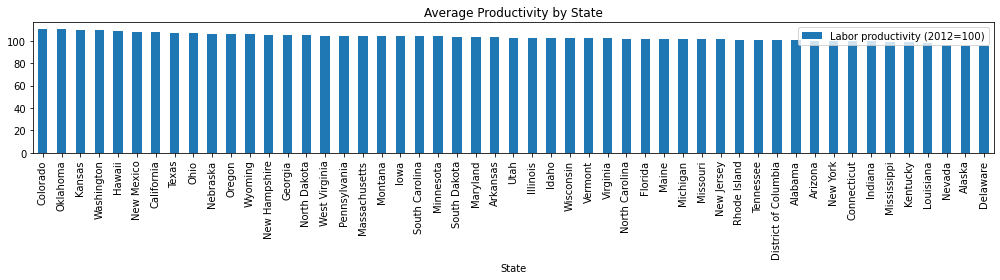

In [6]:
# Group by state and get the averages; then plot for comparison
avg_prod = labor_df.groupby('State').mean()
avg_prod_sorted = avg_prod.sort_values(['Labor productivity (2012=100)'], ascending=False)
avg_prod_sorted.plot(kind="bar", y=['Labor productivity (2012=100)'], figsize=(14,4))

# Print out the highest 5 for visibility
highest_prod = avg_prod_sorted.iloc[0:15,:]
print("HIGHEST 5 STATES LABOR PRODUCTIVITY\n-----------------------")
high_prod_list = []
for index,row in highest_prod.iterrows():
    high_prod_list.append(index)
    print(f"{index}: {round(row['Labor productivity (2012=100)'],2)}")
plt.title('Average Productivity by State')
plt.tight_layout()
plt.savefig('laborproductivity.png')

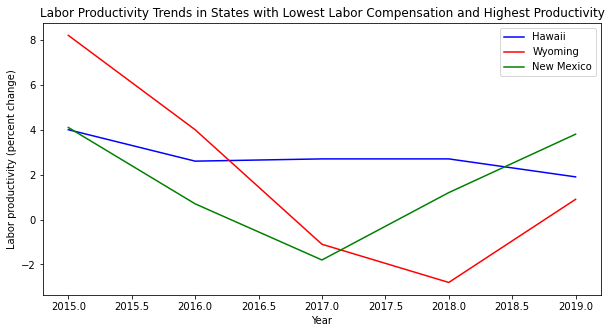

In [9]:
prod_df = labor_df.loc[(labor_df['State'].isin(low_comp_list)) & (labor_df['State'].isin(high_prod_list)),:]
years = prod_df['Year'].unique()
plt.figure(figsize=(10,5))
state1, = plt.plot(years, prod_df.loc[prod_df['State'] == 'Hawaii','Labor productivity (percent change)'],
                  color = 'blue', label = 'Hawaii')
state2, = plt.plot(years, prod_df.loc[prod_df['State'] == 'Wyoming','Labor productivity (percent change)'],
                  color = 'red', label = 'Wyoming')
state3, = plt.plot(years, prod_df.loc[prod_df['State'] == 'New Mexico','Labor productivity (percent change)'],
                  color = 'green', label = 'New Mexico')


plt.legend(handles=[state1, state2, state3], loc='best')
plt.title('Labor Productivity Trends in States with Lowest Labor Compensation and Highest Productivity')
plt.xlabel('Year')
plt.ylabel('Labor productivity (percent change)')
plt.savefig('Trend-line-three.png')
plt.show()

HIGHEST 5 STATES PRODUCTIVITY 
 -----------------------
Hawaii: 2.7800000000000002
California: 2.32
Oregon: 2.12
Colorado: 2.02
Washington: 1.86


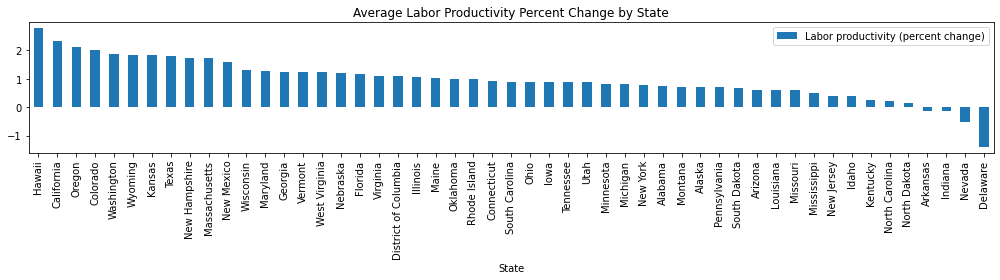

In [8]:
# Group by state and get the averages; then plot for comparison
prod_avg_comp = labor_df.groupby('State').mean()
prod_avg_sorted = prod_avg_comp.sort_values(['Labor productivity (percent change)'], ascending=False)
prod_avg_sorted.plot(kind="bar", y=['Labor productivity (percent change)'], figsize=(14,4))
# Print out the lowest 3 for visibility
prod_avg_comp_sorted = prod_avg_comp.sort_values(['Labor productivity (percent change)'], ascending = False)
highest_prod_comps = prod_avg_comp_sorted.iloc[0:5,:]
print("HIGHEST 5 STATES PRODUCTIVITY \n -----------------------")
highlist = []
for index,row in highest_prod_comps.iterrows():
    print(f"{index}: {row['Labor productivity (percent change)']}")
    highlist.append(index)
plt.title('Average Labor Productivity Percent Change by State')
plt.tight_layout()
plt.savefig('statesProductivitypercentchanges.png')

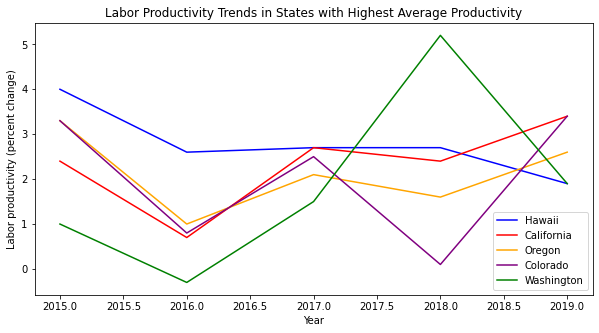

In [9]:
prod_high_df = labor_df.loc[labor_df['State'].isin(highlist),:]
years = labor_df['Year'].unique()
plt.figure(figsize=(10,5))
state1high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[0],'Labor productivity (percent change)'],
                  color = 'blue', label = highlist[0])
state2high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[1],'Labor productivity (percent change)'],
                  color = 'red', label = highlist[1])
state3high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[2],'Labor productivity (percent change)'],
                  color = 'orange', label = highlist[2])
state4high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[3],'Labor productivity (percent change)'],
                  color = 'purple', label = highlist[3])
state5high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[4],'Labor productivity (percent change)'],
                  color = 'green', label = highlist[4])

plt.legend(handles=[state1high, state2high, state3high, state4high, state5high], loc='best')
plt.title('Labor Productivity Trends in States with Highest Average Productivity')
plt.xlabel('Year')
plt.ylabel('Labor productivity (percent change)')
plt.savefig('Laborprodtrends.png')
plt.show()

The correlation between both factors is 0.41


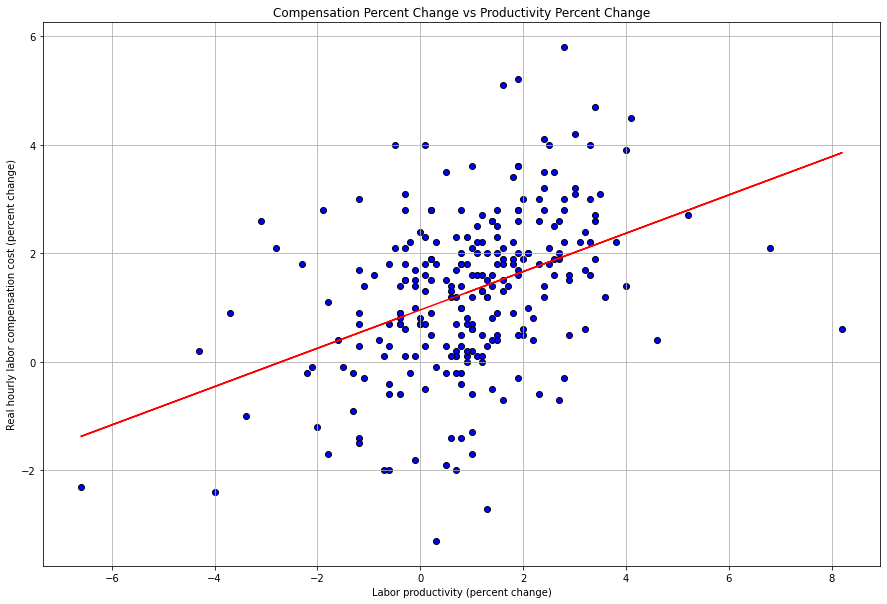

In [9]:
plt.figure(figsize= (15, 10))
laborpro = labor_df['Labor productivity (percent change)']
laborcomp = labor_df['Real hourly labor compensation cost (percent change)']
plt.scatter(laborpro, laborcomp, c='blue', edgecolors = 'black')
plt.xlabel('Labor productivity (percent change)')
plt.ylabel('Real hourly labor compensation cost (percent change)')
slope, intercept, rvalue, pvalue, stderr = linregress(laborpro, laborcomp)
regress = laborpro * slope + intercept
plt.plot(laborpro, regress, 'r-')
plt.grid()
plt.title('Compensation Percent Change vs Productivity Percent Change')
plt.savefig('prodcompscatter.png')
correlation = st.pearsonr(laborpro, laborcomp)
print(f"The correlation between both factors is {round(correlation[0],2)}")


In [11]:
Hawaii_Production_Value = labor_df.loc[labor_df["State"] == "Hawaii", ["Year", "Value of production (million $)"]]
New_Mexico_Production_Value = labor_df.loc[labor_df["State"] == "New Mexico", ["Year", "Value of production (million $)"]]
Wyoming_Production_Value = labor_df.loc[labor_df["State"] == "Wyoming", ["Year", "Value of production (million $)"]]

Top 3 States Change in Value of Production (in millions) from 2015 to 2019:
------------------------------------------
{'Hawaii': 10860.0, 'New Mexico': 9715.0, 'Wyoming': 1347.0}


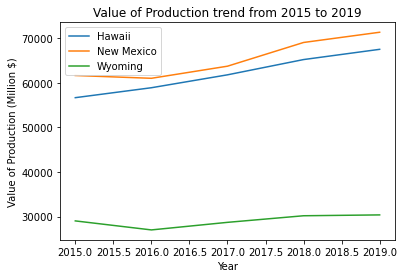

In [12]:
x1=Hawaii_Production_Value["Year"]
y1=Hawaii_Production_Value["Value of production (million $)"]
plt.plot(x1, y1, label = "Hawaii")
x2=New_Mexico_Production_Value["Year"]
y2=New_Mexico_Production_Value["Value of production (million $)"]
plt.plot(x2, y2, label = "New Mexico")
x3=Wyoming_Production_Value["Year"]
y3=Wyoming_Production_Value["Value of production (million $)"]
plt.plot(x3, y3, label = "Wyoming")
plt.xlabel('Year')
plt.ylabel('Value of Production (Million $)')
plt.title('Value of Production trend from 2015 to 2019')
plt.legend()
plt.savefig('production trend.png')
value_changes = {"Hawaii" : round((Hawaii_Production_Value.iloc[4, 1]) - (Hawaii_Production_Value.iloc[0, 1])) ,
"New Mexico" : round((New_Mexico_Production_Value.iloc[4, 1]) - (New_Mexico_Production_Value.iloc[0, 1])) , 
"Wyoming" : round((Wyoming_Production_Value.iloc[4, 1]) - (Wyoming_Production_Value.iloc[0, 1]))}
print(f'Top 3 States Change in Value of Production (in millions) from 2015 to 2019:')
print(f'------------------------------------------')
print(f'{value_changes}')